<a href="https://colab.research.google.com/github/Alister03USA/Data-Science-Projects/blob/main/S%26P500Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import os

In [ ]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,0.0,0.0
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,0.0,0.0
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-06-11 00:00:00-04:00', '2024-06-12 00:00:00-04:00',
               '2024-06-13 00:00:00-04:00', '2024-06-14 00:00:00-04:00',
               '2024-06-17 00:00:00-04:00', '2024-06-18 00:00:00-04:00',
               '2024-06-20 00:00:00-04:00', '2024-06-21 00:00:00-04:00',
               '2024-06-24 00:00:00-04:00', '2024-06-25 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24236, freq=None)

In [ ]:
# Remove unused columns
del sp500['Dividends']
del sp500['Stock Splits']

<Axes: xlabel='Date'>

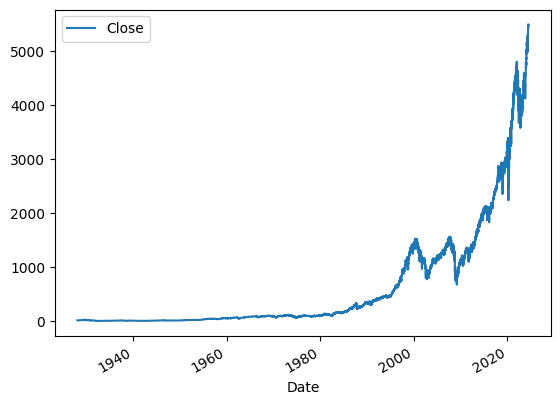

In [ ]:
# Visualize the stock
sp500.plot.line(y="Close", use_index=True)

In [ ]:
#Have a column to show tmr's price
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,5473.169922
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5464.620117
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117


In [ ]:
# Set up our target for ML
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,5473.169922,0
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5464.620117,0
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117,0


In [ ]:
# Use newer data (only after a specific date)
sp500 = sp500.loc["1993-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1993-01-04 00:00:00-05:00,435.700012,437.320007,434.480011,435.380005,201210000,434.339996,0
1993-01-05 00:00:00-05:00,435.380005,435.399994,433.549988,434.339996,240350000,434.519989,1
1993-01-06 00:00:00-05:00,434.339996,435.170013,432.519989,434.519989,295240000,430.730011,0
1993-01-07 00:00:00-05:00,434.519989,435.459991,429.760010,430.730011,304850000,429.049988,0
1993-01-08 00:00:00-05:00,430.730011,430.730011,426.880005,429.049988,263470000,430.950012,1
...,...,...,...,...,...,...,...
2024-06-18 00:00:00-04:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,5473.169922,0
2024-06-20 00:00:00-04:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5464.620117,0
2024-06-21 00:00:00-04:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5447.870117,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100] # First until the last 100 to train
test = sp500.iloc[-100:] # Use the last 100 to test

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

<Axes: xlabel='Date'>

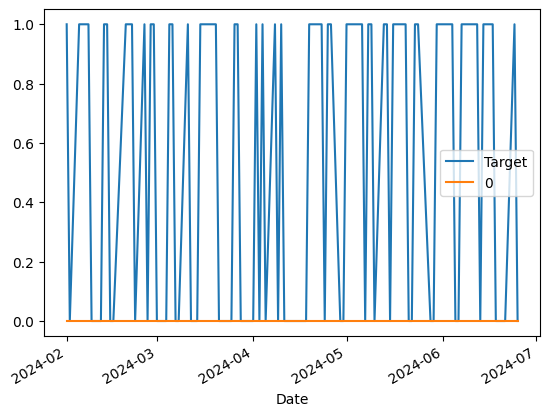

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

Predictions
0    3136
1    2290
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5327510917030568

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.543679
0    0.456321
Name: count, dtype: float64

In [ ]:

horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)


In [ ]:
predictions["Predictions"].value_counts()


Predictions
0.0    3776
1.0     650
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5584615384615385

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
1    0.541573
0    0.458427
Name: count, dtype: float64